# Table `flights` - Explore the data

In [1]:
import numpy as np
import pandas as pd


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

In [11]:
sns.set_theme()

## Subset 1 from the `flights` table (0.3% of all data, selected randomly)

In [2]:
flights_sample = pd.read_csv('flights_ran_subset.csv', index_col=0)
flights_sample.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-09-03,WN,WN,WN,2570,WN,N248WN,2570,13232,MDW,...,691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-03,WN,WN,WN,450,WN,N411WN,450,14524,RIC,...,481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-03,WN,WN,WN,1972,WN,N7888A,1972,14679,SAN,...,1313.0,0.0,0.0,7.0,0.0,28.0,NaN,NaN,NaN,NaN
3,2018-09-03,WN,WN,WN,1368,WN,N8612K,1368,14831,SJC,...,2421.0,0.0,0.0,19.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2018-09-03,WN,WN,WN,872,WN,N7887A,872,14831,SJC,...,342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DataFrame info

In [3]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47506 entries, 0 to 47505
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fl_date              47506 non-null  object 
 1   mkt_unique_carrier   47506 non-null  object 
 2   branded_code_share   47506 non-null  object 
 3   mkt_carrier          47506 non-null  object 
 4   mkt_carrier_fl_num   47506 non-null  int64  
 5   op_unique_carrier    47506 non-null  object 
 6   tail_num             47360 non-null  object 
 7   op_carrier_fl_num    47506 non-null  int64  
 8   origin_airport_id    47506 non-null  int64  
 9   origin               47506 non-null  object 
 10  origin_city_name     47506 non-null  object 
 11  dest_airport_id      47506 non-null  int64  
 12  dest                 47506 non-null  object 
 13  dest_city_name       47506 non-null  object 
 14  crs_dep_time         47506 non-null  int64  
 15  dep_time             46742 non-null 

### Percentage of missing values in each column

In [5]:
round(flights_sample.isnull().sum() / len(flights_sample) * 100, 2)

# 1.96% of arr_delay - missing values

fl_date                  0.00
mkt_unique_carrier       0.00
branded_code_share       0.00
mkt_carrier              0.00
mkt_carrier_fl_num       0.00
op_unique_carrier        0.00
tail_num                 0.31
op_carrier_fl_num        0.00
origin_airport_id        0.00
origin                   0.00
origin_city_name         0.00
dest_airport_id          0.00
dest                     0.00
dest_city_name           0.00
crs_dep_time             0.00
dep_time                 1.61
dep_delay                1.64
taxi_out                 1.73
wheels_off               1.73
wheels_on                1.77
taxi_in                  1.77
crs_arr_time             0.00
arr_time                 1.71
arr_delay                1.96
cancelled                0.00
cancellation_code       98.33
diverted                 0.00
dup                      0.00
crs_elapsed_time         0.00
actual_elapsed_time      1.95
air_time                 2.01
flights                  0.00
distance                 0.00
carrier_de

## Summary statistics

### Numeric columns:

In [9]:
flights_sample.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,47506.000000,47506.000000,47506.000000,47506.000000,47506.000000,46742.000000,46727.000000,46686.00000,46686.000000,46665.000000,...,47506.000000,9079.000000,9079.000000,9079.000000,9079.000000,9079.000000,333.000000,333.000000,333.000000,0.0
mean,2742.310824,2742.119311,12680.708563,12689.472382,1331.582600,1336.553613,10.579429,17.56126,1361.885319,1461.735412,...,767.277270,21.438705,3.208613,16.195506,0.088005,26.108602,1263.072072,35.552553,34.732733,NaN
std,1860.962163,1860.877707,1522.347632,1525.752891,488.587162,502.075882,48.613377,10.17658,503.355848,533.270454,...,587.592714,69.990375,25.931759,37.433310,2.429229,51.637575,509.175876,31.381846,30.212860,NaN
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-40.000000,1.00000,1.000000,1.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000,NaN
25%,1128.000000,1128.000000,11292.000000,11292.000000,918.000000,920.000000,-6.000000,11.00000,936.000000,1046.000000,...,342.000000,0.000000,0.000000,0.000000,0.000000,0.000000,822.000000,16.000000,15.000000,NaN
50%,2336.000000,2336.000000,12889.000000,12889.000000,1325.000000,1329.000000,-2.000000,15.00000,1343.000000,1502.000000,...,602.000000,0.000000,0.000000,3.000000,0.000000,3.000000,1230.000000,26.000000,26.000000,NaN
75%,4335.000000,4333.750000,14057.000000,14057.000000,1736.000000,1746.000000,7.000000,20.00000,1802.000000,1910.000000,...,997.000000,17.000000,0.000000,20.000000,0.000000,32.000000,1657.000000,42.000000,42.000000,NaN
max,9370.000000,9370.000000,16218.000000,16218.000000,2359.000000,2400.000000,1486.000000,169.00000,2400.000000,2400.000000,...,5095.000000,1486.000000,1010.000000,1183.000000,167.000000,997.000000,2347.000000,170.000000,170.000000,NaN


In [14]:
flights_sample[['dep_delay', 'arr_delay', 'cancelled', 'diverted']].describe()

,dep_delay,arr_delay,cancelled,diverted
count,46727.000000,46576.000000,47506.000000,47506.000000
mean,10.579429,5.602327,0.016735,0.002715
std,48.613377,50.677941,0.128277,0.052040
min,-40.000000,-85.000000,0.000000,0.000000
25%,-6.000000,-15.000000,0.000000,0.000000
50%,-2.000000,-6.000000,0.000000,0.000000
75%,7.000000,8.000000,0.000000,0.000000
max,1486.000000,1493.000000,1.000000,1.000000


In [3]:
flights_sample[['crs_dep_time', 'dep_time', 'crs_arr_time', 'arr_time']].describe()

# Ranges for time (local time in hhmm):
# scheduled time (crs_dep_time, crs_arr_time) - int values from 1 to 2359
# actual time (dep_time, arr_time) - float values from 1.0 to 2400.0

,crs_dep_time,dep_time,crs_arr_time,arr_time
count,47506.000000,46742.000000,47506.000000,46695.000000
mean,1331.582600,1336.553613,1486.097903,1466.279088
std,488.587162,502.075882,517.509013,537.416116
min,1.000000,1.000000,1.000000,1.000000
25%,918.000000,920.000000,1100.000000,1050.000000
50%,1325.000000,1329.000000,1515.000000,1506.000000
75%,1736.000000,1746.000000,1919.000000,1915.000000
max,2359.000000,2400.000000,2359.000000,2400.000000


In [4]:
flights_sample[['distance', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time']].describe()

# distances: from 31 to 5095 miles

,distance,crs_elapsed_time,actual_elapsed_time,air_time
count,47506.000000,47506.000000,46582.000000,46552.000000
mean,767.277270,137.725087,133.071637,107.899381
std,587.592714,71.687360,71.836299,69.857965
min,31.000000,20.000000,19.000000,8.000000
25%,342.000000,87.000000,82.000000,58.000000
50%,602.000000,119.000000,114.000000,89.000000
75%,997.000000,167.000000,163.000000,136.000000
max,5095.000000,690.000000,714.000000,678.000000


In [13]:
flights_sample[['flights']].describe()

# all values are 1.0

,flights
count,47506.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


### Non-numeric columns:

In [16]:
str_cols = flights_sample.dtypes.index[flights_sample.dtypes == 'object']
str_cols

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'op_unique_carrier', 'tail_num', 'origin', 'origin_city_name', 'dest',
       'dest_city_name', 'cancellation_code', 'dup'],
      dtype='object')

In [17]:
flights_sample[str_cols].describe()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,cancellation_code,dup
count,47506,47506,47506,47506,47506,47360,47506,47506,47506,47506,795,47506
unique,730,11,16,11,28,6017,367,361,364,358,3,1
top,2018-07-23,AA,WN,AA,WN,N495HA,ATL,"Chicago, IL",ORD,"Chicago, IL",B,N
freq,93,12268,8117,12268,8117,27,2372,2844,2451,2965,409,47506


### Cancelled and diverted flights

In [11]:
flights_sample['cancelled'].value_counts()

0.0    46711
1.0      795
Name: cancelled, dtype: int64

In [11]:
flights_sample['arr_delay'][flights_sample['cancelled'] == 1].isnull().sum()

# for cancelled flights arr_delay is null

795

In [8]:
flights_sample['diverted'].value_counts()

0.0    47377
1.0      129
Name: diverted, dtype: int64

In [12]:
flights_sample['arr_delay'][flights_sample['diverted'] == 1].isnull().sum()

# for diverted flights arr_delay is null

129

### Different types of delays, proportions in the subset

In [13]:
num_arr_delays = len(flights_sample['arr_delay'][flights_sample['arr_delay'] > 0])
num_arr_delays

# delays - 34.8% of all flights in this subset

16552

In [14]:
num_arr_delays_neg = len(flights_sample['arr_delay'][flights_sample['arr_delay'] < 0])
num_arr_delays_neg

# early arrival - 61.3% of flights in the subset

29128

In [15]:
num_arr_delays_on_time = len(flights_sample['arr_delay'][flights_sample['arr_delay'] == 0])
num_arr_delays_on_time

# on time - 1.9%

896

In [16]:
num_arr_delays_null = len(flights_sample['arr_delay'][flights_sample['arr_delay'].isnull()])
num_arr_delays_null

# missing values (795 cancelled flights + 129 diverted flights + 6 null values for some other reason) - about 2%

930

### Arrival delays histogram

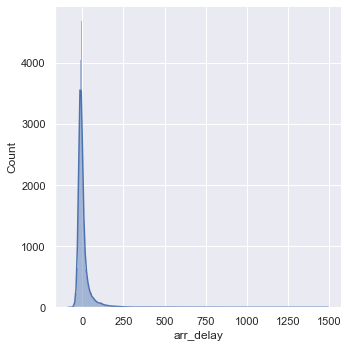

In [16]:
sns.set_theme()
sns.displot(data=flights_sample, x='arr_delay', kde=True, bins=500)

In [ ]:
# flights_sample['arr_delay'].plot.hist(bins=500)

### dep_delay and arr_delay 
Strong linear correlation

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

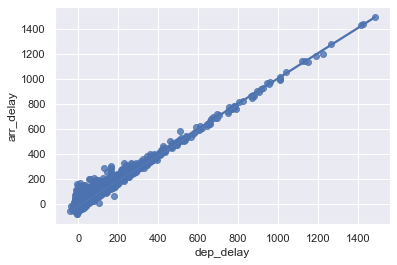

In [44]:
sns.regplot(data=flights_sample, x='dep_delay', y='arr_delay')

## Airports (origin_airport_id, dest_airport_id)

In [18]:
len(flights_sample['origin_airport_id'].unique())

367

In [19]:
len(flights_sample['origin'].unique())

367

In [20]:
len(flights_sample['dest_airport_id'].unique())

364

In [21]:
len(flights_sample['dest'].unique())

364

### Unique airports in the subset

In [46]:
origin_set = set(flights_sample['origin_airport_id'].unique())
dest_set = set(flights_sample['dest_airport_id'].unique())
airports_set = origin_set | dest_set
len(airports_set)

# at least 369 airports
# ! need to check their number in the original dataset

369

### Delays by origin

In [6]:
delays_by_origin = flights_sample[['origin', 'dep_delay','arr_delay']].groupby('origin').mean()
delays_by_origin

,dep_delay,arr_delay
origin,,
ABE,-0.500000,-3.638889
ABI,16.555556,15.666667
ABQ,7.143750,2.712500
ABR,0.000000,-6.000000
ABY,-3.363636,-7.272727
...,...,...
WYS,5.500000,11.500000
XNA,17.101010,14.948980
YAK,-13.333333,-17.166667


Sort by arr_delay, descending order:

In [8]:
delays_by_origin.sort_values('arr_delay', ascending=False).head(20)

# high average arr delays were at the airports with high average dep delays

,dep_delay,arr_delay
origin,,
SLN,166.333333,161.222222
IPT,129.666667,135.000000
BKG,123.000000,121.000000
OWB,104.000000,99.000000
SCK,91.166667,89.333333
MKK,79.571429,83.714286
JMS,79.444444,82.888889
DVL,80.166667,76.000000
CDC,64.750000,66.500000


In [9]:
delays_by_origin.sort_values('arr_delay', ascending=False).tail(20)

,dep_delay,arr_delay
origin,,
LBF,-15.000000,-15.750000
GTR,-5.000000,-15.750000
ART,-5.000000,-16.000000
BGM,-6.250000,-16.750000
ESC,-8.500000,-17.000000
RKS,-2.000000,-17.000000
MHK,-3.818182,-17.090909
YAK,-13.333333,-17.166667
HDN,-7.800000,-17.800000


### Delays by origin and dest

In [12]:
delays_by_origin_dest = flights_sample[['origin', 'dest', 'dep_delay', 'arr_delay', 
                                        'crs_elapsed_time', 'air_time', 'distance']].groupby(['origin', 'dest']).mean()
delays_by_origin_dest

dep_delay  arr_delay  crs_elapsed_time    air_time  distance
origin dest                                                              
ABE    ATL    1.555556   2.333333        131.222222  101.888889   692.000
       CLT   -3.000000 -10.600000        128.800000   93.600000   481.000
       DTW    4.000000  -2.200000        107.833333   80.200000   425.000
       FLL   -3.000000 -11.000000        170.000000  148.000000  1041.000
       ORD    4.500000   0.375000        143.250000  112.375000   654.125
...                ...        ...               ...         ...       ...
YAK    CDV  -20.000000 -27.500000         51.000000   36.000000   213.000
       JNU  -10.000000 -12.000000         48.750000   33.500000   198.000
YKM    SEA    0.200000  -3.100000         46.100000   28.600000   103.000
YUM    DFW   -8.500000  -8.000000        161.000000  135.000000  1022.000
       PHX   -5.500000  -8.250000         55.750000   32.000000   160.000

[5349 rows x 5 columns]

In [13]:
delays_by_origin_dest.sort_values('arr_delay', ascending=False).head(20)


dep_delay   arr_delay  crs_elapsed_time    air_time  distance
origin dest                                                                
ACV    DEN   447.000000  444.000000        163.000000  138.000000    1026.0
EWR    AVP   375.500000  368.500000         75.000000   27.000000      93.0
JAX    EWR   316.000000  309.750000        147.000000  109.750000     820.0
ORD    EGE   310.333333  309.000000        174.000000  155.333333    1007.0
SJC    ORD   308.600000  306.000000        253.200000  222.000000    1829.0
PHX    HNL   309.250000  298.750000        412.250000  386.750000    2917.0
       LGB   250.666667  253.000000         76.666667   57.333333     355.0
EWR    TVC   217.000000  218.000000        145.000000  121.000000     644.0
BFL    SFO   224.500000  214.500000         77.000000   43.500000     238.0
SLN    HYS   219.142857  211.428571         62.000000   25.000000      88.0
ATL    BUR   205.000000  201.000000        274.000000  247.000000    1941.0
PNS    MCI   207.000000  200.000000        120.000000   99.000000     743.0
BOS    STT   158.000000  199.000000        235.000000  252.000000    1693.0
PIA    DFW   205.000000  197.666667        140.000000  109.666667     672.0
DSM    MCO   204.000000  196.000000        166.000000  130.000000    1141.0
DTW    SNA   205.000000  195.000000        307.000000  266.000000    1960.0
LWB    IAD   190.000000  191.000000         57.000000   33.000000     176.0
LEX    PGD   194.500000  185.500000        123.500000  100.000000     781.0
AUS    SLC   188.400000  184.200000        183.800000  156.200000    1086.0
       RNO   196.000000  182.000000        212.000000  179.000000    1405.0

<AxesSubplot:xlabel='distance', ylabel='arr_delay'>

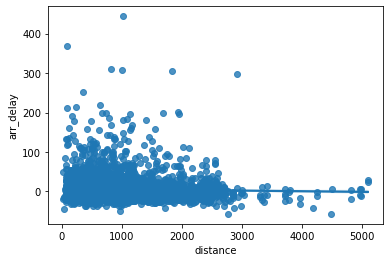

In [9]:
sns.regplot(data=delays_by_origin_dest, x='distance', y='arr_delay')

<AxesSubplot:xlabel='air_time', ylabel='arr_delay'>

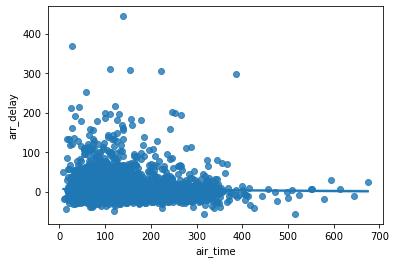

In [6]:
sns.regplot(data=delays_by_origin_dest, x='air_time', y='arr_delay')

<AxesSubplot:xlabel='air_time', ylabel='distance'>

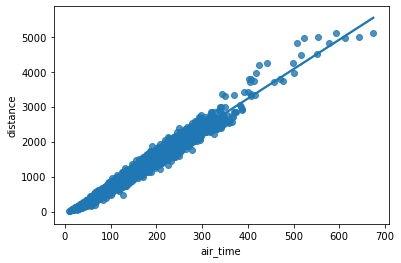

In [10]:
sns.regplot(data=delays_by_origin_dest, x='air_time', y='distance')

# actual air time vs. distance for origin - dest pairs

<AxesSubplot:xlabel='air_time', ylabel='crs_elapsed_time'>

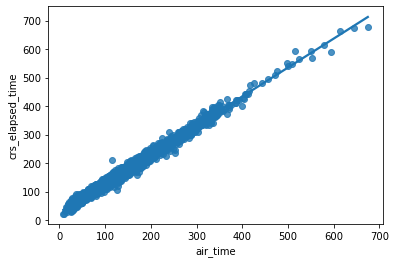

In [14]:
sns.regplot(data=delays_by_origin_dest, x='air_time', y='crs_elapsed_time')

# we have crs_elapsed_time (total time incl. air time) in test set, can use it without adding air_time
# or we can use distance

## Carriers (mkt_unique_carrier, op_unique_carrier)

In [22]:
len(flights_sample[flights_sample['mkt_unique_carrier'] != flights_sample['op_unique_carrier']])

# very often marketing carrier and operating carrier are different
# maybe better to use op_unique_carrier

18135

In [23]:
flights_sample[flights_sample['mkt_unique_carrier'] != flights_sample['op_unique_carrier']].head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
7,2018-09-03,UA,UA_CODESHARE,UA,4446,EV,N16559,4446,12266,IAH,...,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2018-09-03,AA,AA_CODESHARE,AA,3798,MQ,N658AE,3798,13303,MIA,...,990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2018-09-03,DL,DL_CODESHARE,DL,3393,9E,N980EV,3393,11433,DTW,...,460.0,3.0,0.0,0.0,0.0,67.0,NaN,NaN,NaN,NaN
15,2018-09-03,AA,AA_CODESHARE,AA,4036,MQ,N833AE,4036,11298,DFW,...,431.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2018-09-03,AA,AA_CODESHARE,AA,5454,OH,N534EA,5454,10599,BHM,...,772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2018-09-03,AA,AA_CODESHARE,AA,3374,MQ,N817AE,3374,11433,DTW,...,502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2018-09-04,AS,AS_CODESHARE,AS,2282,QX,N624QX,2282,14747,SEA,...,379.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,2018-09-04,AS,AS_CODESHARE,AS,2329,QX,N452QX,2329,10666,BLI,...,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,2018-09-04,AS,AS_CODESHARE,AS,2554,QX,N624QX,2554,14831,SJC,...,569.0,22.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
33,2018-09-04,UA,UA_CODESHARE,UA,3417,YX,N750YX,3417,11618,EWR,...,1372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Number of unique carriers in the subset

In [24]:
len(flights_sample['op_unique_carrier'].unique())

# 28 unique operating carriers in this subset. 
# Need to check the number of unique operating carriers in original dataset

28

In [25]:
len(flights_sample['mkt_unique_carrier'].unique())

11

### Average arr_delay and dep_delay by operating carrier

<AxesSubplot:xlabel='arr_delay', ylabel='op_unique_carrier'>

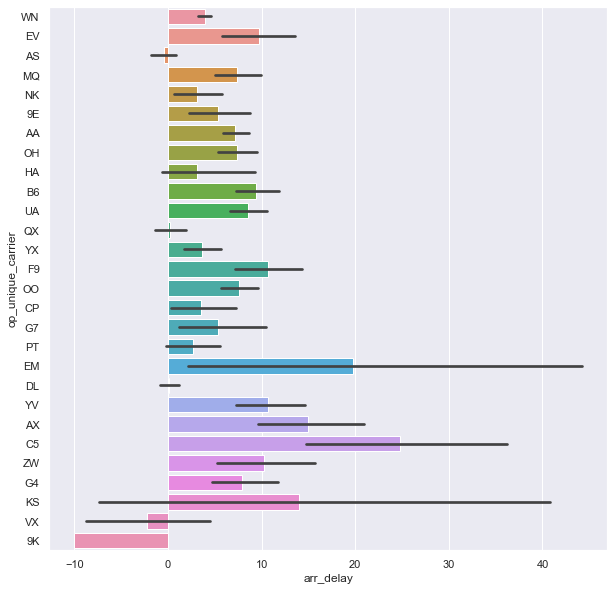

In [34]:
plt.figure(figsize=(10, 10))
sns.barplot(data=flights_sample, x='arr_delay', y='op_unique_carrier', orient='h')

# the bars are the average values of arr_delay
# black lines represent the 95% confidence interval

<AxesSubplot:xlabel='dep_delay', ylabel='op_unique_carrier'>

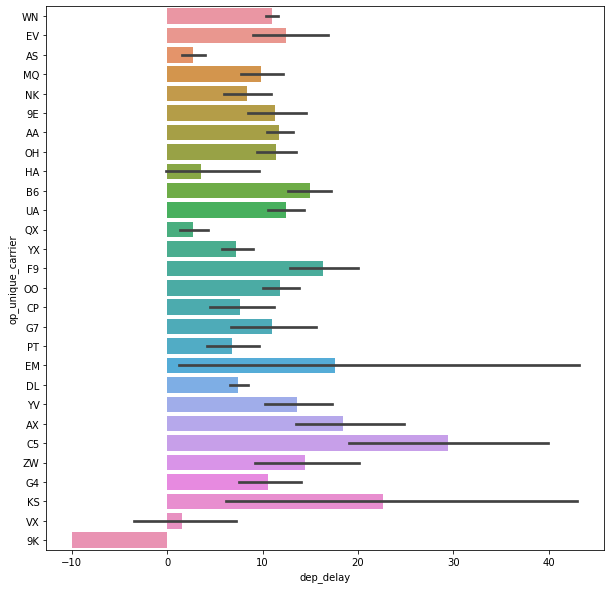

In [3]:
plt.figure(figsize=(10, 10))
sns.barplot(data=flights_sample, x='dep_delay', y='op_unique_carrier', orient='h')

## Flight numbers

In [26]:
# flight number is different for mkt_carrier and op_carrier

len(flights_sample[flights_sample['mkt_carrier_fl_num'] != flights_sample['op_carrier_fl_num']])

6

In [27]:
flights_sample[flights_sample['mkt_carrier_fl_num'] != flights_sample['op_carrier_fl_num']]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
13155,2019-07-17,UA,UA_CODESHARE,UA,6095,YX,N731YX,3287,11298,DFW,...,224.0,0.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN,NaN
28961,2019-02-14,DL,DL_CODESHARE,DL,5750,OO,N268SY,7337,14831,SJC,...,584.0,0.0,0.0,6.0,0.0,153.0,NaN,NaN,NaN,NaN
29697,2019-02-25,UA,UA_CODESHARE,UA,3988,YX,N639RW,3286,12266,IAH,...,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33282,2019-11-21,UA,UA_CODESHARE,UA,4809,YV,N86334,3225,12264,IAD,...,288.0,42.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
34615,2018-12-13,UA,UA_CODESHARE,UA,3978,ZW,N462AW,3152,12884,LAN,...,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46007,2018-02-06,UA,UA_CODESHARE,UA,6111,OO,N797SK,1346,13851,OKC,...,395.0,0.0,101.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN


In [28]:
len(flights_sample['op_carrier_fl_num'].unique())

# too many unique flight number values

6530

In [29]:
len(flights_sample['mkt_carrier_fl_num'].unique())

6530

## Distance, elapsed time

<AxesSubplot:>

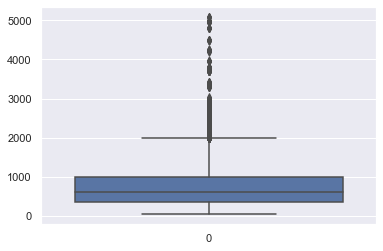

In [40]:
sns.boxplot(data=flights_sample['distance'])

<AxesSubplot:>

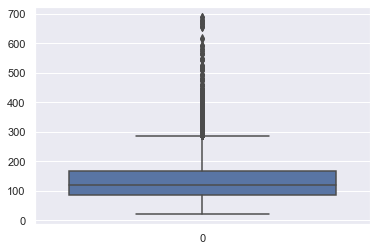

In [39]:
sns.boxplot(data=flights_sample['crs_elapsed_time'])

<AxesSubplot:xlabel='crs_elapsed_time', ylabel='distance'>

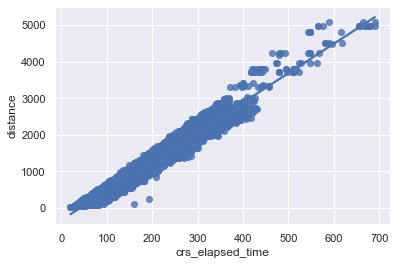

In [51]:
sns.regplot(data=flights_sample, x='crs_elapsed_time', y='distance')

# linear correlation
# choose one of them?

<AxesSubplot:xlabel='crs_elapsed_time', ylabel='actual_elapsed_time'>

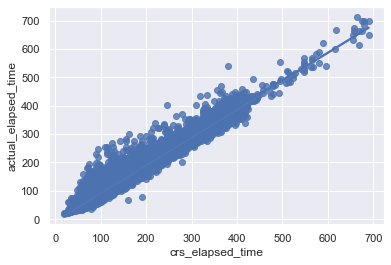

In [12]:
sns.regplot(data=flights_sample, x='crs_elapsed_time', y='actual_elapsed_time')

<AxesSubplot:xlabel='distance', ylabel='arr_delay'>

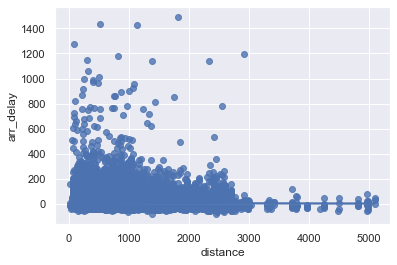

In [42]:
sns.regplot(data=flights_sample, x='distance', y='arr_delay')

# for distances longer than 3000 miles the arr_delay values are smaller, 
# but there are few flights with such distances in the subset.
# 75% of all flights had distances <= 997 miles

In [13]:
len(flights_sample[flights_sample['distance'] > 3000])

95

<AxesSubplot:xlabel='crs_elapsed_time', ylabel='arr_delay'>

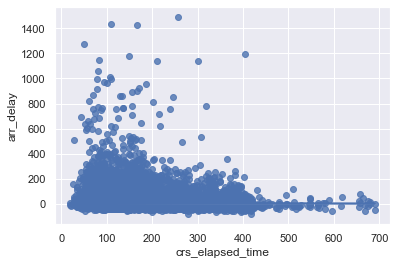

In [30]:
sns.regplot(data=flights_sample, x='crs_elapsed_time', y='arr_delay')